<a href="https://colab.research.google.com/github/Yerraguntla-Rajesh/Machine-Learning/blob/main/startups_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
     

In [63]:
# insert .csv dataset
data=pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [64]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
#displays the null values count
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [66]:
#to display information of columns and datatypes fo the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [67]:
# summary of the dataset
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [68]:
#displaying mean of the columns of dataset
data.describe().loc['mean']

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
Name: mean, dtype: float64

<Axes: >

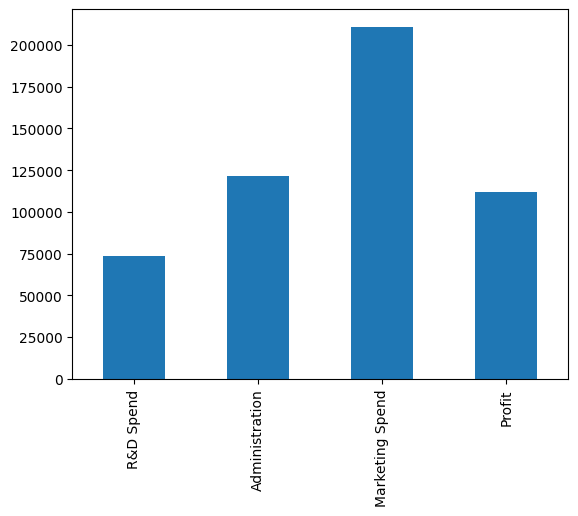

In [69]:
#plotting the bar graph on mean
data.describe().loc['mean'].plot.bar()

In [70]:
#Importing  data into "x" and "y" data of  dataset
x = data.select_dtypes(include=np.number)
x = x.drop('Profit', axis=1).values
y = np.array(data['Profit'])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
#Splitting of training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)
     


In [73]:
x_train.shape,y_train.shape


((35, 3), (35,))

In [74]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [75]:
#Performing the metrics on model of traning data 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred1 = reg.predict(x_train)
print('Mean Absolute Error = ',mean_absolute_error(y_train,y_pred1))
print('Mean Squared Error = ',mean_squared_error(y_train,y_pred1))
print('RMSE = ',np.sqrt(mean_squared_error(y_train, y_pred1)))
print('r2_score=',r2_score(y_train,y_pred1))
     

Mean Absolute Error =  6618.070689949246
Mean Squared Error =  82041812.2125714
RMSE =  9057.693537130266
r2_score= 0.9508557563847194


In [76]:
#Performing the metrics on model of testing data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred2 = reg.predict(x_test)
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred2))
print('Mean Squared Error = ',mean_squared_error(y_test,y_pred2))
print('RMSE = ',np.sqrt(mean_squared_error(y_test, y_pred2)))
print('r2_score=',r2_score(y_test,y_pred2))

Mean Absolute Error =  7222.594346965514
Mean Squared Error =  81772149.43547146
RMSE =  9042.795443637518
r2_score= 0.9418819530700165


In [78]:
#Fitting lasso regression
reg1 = Lasso(alpha=0.6)
reg1.fit(x_train,y_train)

Lasso(alpha=0.6)

In [54]:
#Performing the metrics on model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred3 = reg.predict(x_train)
print('Mean Absolute Error = ',mean_absolute_error(y_train,y_pred3))
print('Mean Squared Error = ',mean_squared_error(y_train,y_pred3))
print('RMSE = ',np.sqrt(mean_squared_error(y_train, y_pred3)))
print('r2_score=',r2_score(y_train,y_pred3))

Mean Absolute Error =  6618.070689949246
Mean Squared Error =  82041812.2125714
RMSE =  9057.693537130266
r2_score= 0.9508557563847194


In [56]:
#Fitting ridge regression
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha=0.6)
reg2.fit(x_train,y_train)

Ridge(alpha=0.6)

In [57]:
#Performing the metrics on model of training data
y_pred5 = reg.predict(x_train)
print('Mean Absolute Error = ',mean_absolute_error(y_train,y_pred5))
print('Mean Squared Error = ',mean_squared_error(y_train,y_pred5))
print('RMSE = ',np.sqrt(mean_squared_error(y_train, y_pred5)))
print('r2_score=',r2_score(y_train,y_pred5))
     

Mean Absolute Error =  6618.070689949246
Mean Squared Error =  82041812.2125714
RMSE =  9057.693537130266
r2_score= 0.9508557563847194


In [58]:
#Performing the metrics on model of testing data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred6 = reg.predict(x_test)
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred6))
print('Mean Squared Error = ',mean_squared_error(y_test,y_pred6))
print('RMSE = ',np.sqrt(mean_squared_error(y_test, y_pred6)))
print('r2_score=',r2_score(y_test,y_pred6))

Mean Absolute Error =  7222.594346965514
Mean Squared Error =  81772149.43547146
RMSE =  9042.795443637518
r2_score= 0.9418819530700165
